In [55]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')
data = pd.read_csv('./input/insurance.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor





In [56]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Adjust string features

In [57]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
# region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [5])], remainder='passthrough')
# dataset = columnTransformer.fit_transform(data)


Add hotencoder to collumns

In [58]:
# print(dataset[0:5,:])

# print(data.region.drop_duplicates())
# data["isSouthwest"] = dataset[:,3]
# data["isSoutheast"] = dataset[:, 2]
# data["isNorthwest"] = dataset[:, 1]
# data["isNortheast"] = dataset[:, 0]



In [59]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

From these results, we can infer that smoking is the feature most correlated to the insurance charges, followed by age, BMI, residing in the Southeast, number of children, sex and, finally, residing in the Northeast, Northwest and Southwest.

We must take into consideration that there are most likely correlations between different features.

Correlation with features

<AxesSubplot:>

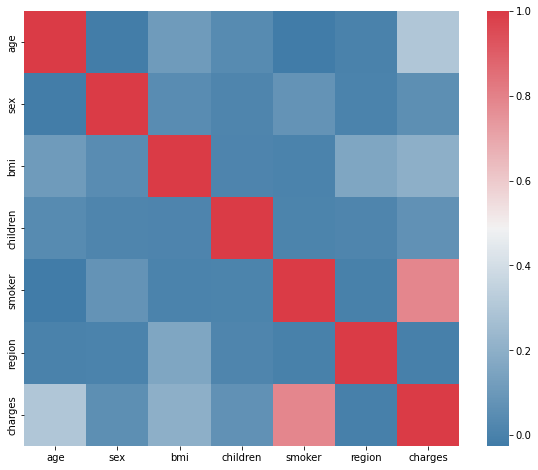

In [60]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

This graph restates what we previously investigated. Additionally, it exposes correlations. Most notably, individuals from the Southeast tend to have higher BMI. This is to be expected, as most Southeastern states have a high prevalence of obesity, according to the CDC. Due to this fact, residing in the Southeast does not likely imply higher charges. They are probably related to the higher average BMI in comparison to the remaining regions, as this is the third feature most correlated to the charges.

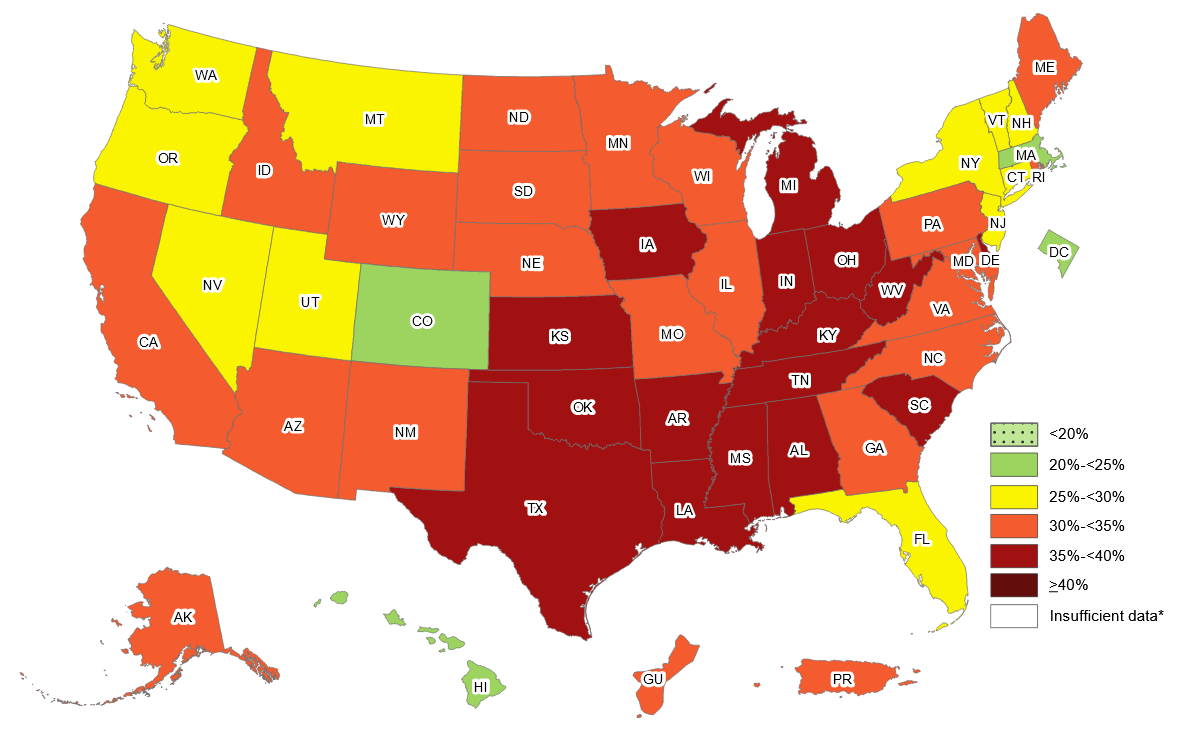


Plot stuff

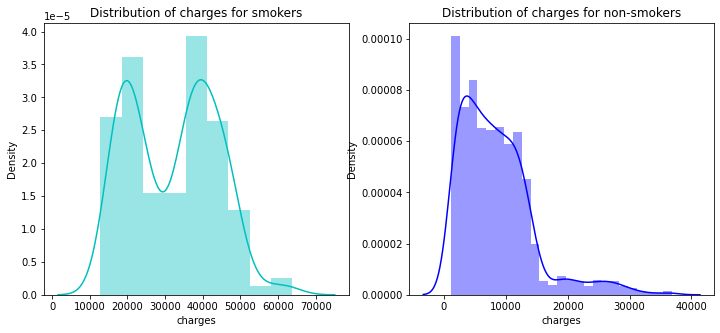

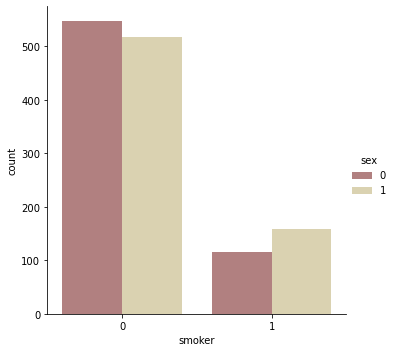

In [61]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

In [82]:
N_STATES = 10  # Number of random states to be used in train_test_split

x = data.drop(['charges'], axis = 1)
y = data.charges

# We tested dropping the region feature from x as well. The results were:
# scores_lr_avg = 0.7513289498254141
# scores_rfr_avg = 0.8322073510803856
# They were marginally worse than the results obtained without dropping it.


x_trains = []
x_tests = []
y_trains = []
y_tests = []

for i in range(N_STATES):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i)
    x_trains.append(x_train)
    x_tests.append(x_test)
    y_trains.append(y_train)
    y_tests.append(y_test)

# Obs.: Standardization had no effects, and thus was not applied. The same was verified for normalization.

# Standardization
# scalar = StandardScaler()
# scalar.fit(x_train)
# x_train = scalar.transform(x_train)
# x_test = scalar.transform(x_test)

scores_lr = []
scores_rfr = []
scores_knr = []

for i in range(len(x_trains)):
    lr = LinearRegression().fit(x_trains[i], y_trains[i])
    scores_lr.append(lr.score(x_tests[i], y_tests[i]))
    rfr = RandomForestRegressor(random_state = 1).fit(x_trains[i], y_trains[i])
    scores_rfr.append(rfr.score(x_tests[i], y_tests[i]))
    knr = KNeighborsRegressor(n_neighbors=10).fit(x_trains[i], y_trains[i])
    scores_knr.append(knr.score(x_tests[i], y_tests[i]))



# lr = LinearRegression().fit(x_train, y_train)
# lr = RidgeCV(alphas=np.arange(70,100,0.1), fit_intercept=True).fit(x_train, y_train)
# rfr = RandomForestRegressor(random_state = 0).fit(x_train, y_train)

# y_train_pred = lr.predict(x_train)
# y_test_pred = lr.predict(x_test)

# rfr_y_train_pred = rfr.predict(x_train)
# rfr_y_test_pred = rfr.predict(x_train)

scores_lr_avg = sum(scores_lr) / len(scores_lr)
scores_rfr_avg = sum(scores_rfr) / len(scores_rfr)
scores_knr_avg = sum(scores_knr) / len(scores_knr)


print(f'{scores_lr_avg = }\n{scores_rfr_avg = }\n{scores_knr_avg = }')
print(f'{scores_lr[0] = }')

scores_lr_avg = 0.7521863757876472
scores_rfr_avg = 0.8419907865228108
scores_knr_avg = 0.14234128121496123
scores_lr[0] = 0.7962732059725786


In [84]:
X = data.drop(['charges', 'region'], axis = 1)
Y = data.charges


quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(X)

X_trains = []
X_tests = []
Y_trains = []
Y_tests = []

for i in range(N_STATES):
    X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state = i)
    X_trains.append(X_train)
    X_tests.append(X_test)
    Y_trains.append(Y_train)
    Y_tests.append(Y_test)

# X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

scores = []
for i in range(len(X_trains)):
    plr = LinearRegression().fit(X_trains[i], Y_trains[i])
#     Y_train_pred = plr.predict(X_trains[i])
#     Y_test_pred = plr.predict(X_tests[i])
    scores.append(plr.score(X_tests[i], Y_tests[i]))

# plr = LinearRegression().fit(X_train,Y_train)

# Y_train_pred = plr.predict(X_train)
# Y_test_pred = plr.predict(X_test)

# print(plr.score(X_test,Y_test))
print(f'Average score: {sum(scores) / len(scores)}')
print(f'{scores[0] = }')

Average score: 0.8469918875734292
scores[0] = 0.8849197344147238


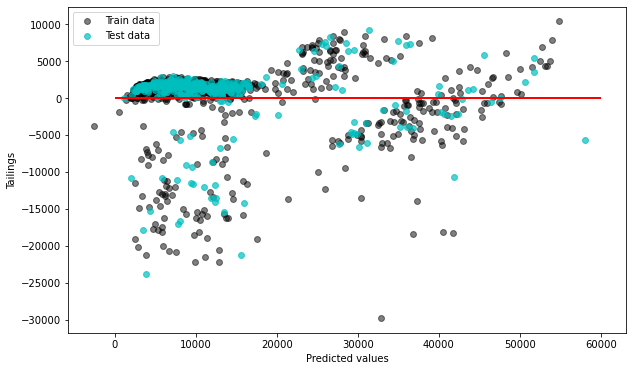

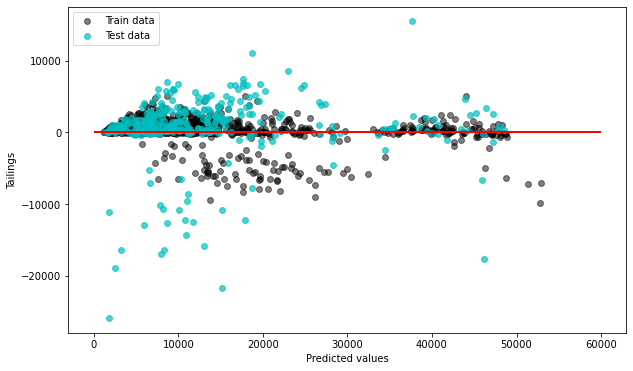

In [88]:
Y_train_pred = plr.predict(X_trains[-1])
Y_test_pred = plr.predict(X_tests[-1])

forest_train_pred = rfr.predict(x_trains[-1])
forest_test_pred = rfr.predict(x_tests[-1])


pl.figure(figsize=(10,6))

pl.scatter(Y_train_pred, Y_train_pred - Y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(Y_test_pred, Y_test_pred - Y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred, forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred, forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
# pl.scatter(range(len(forest_train_pred)), forest_train_pred, c='red', lineWidth=.5)
# pl.scatter(range(len(y_train)), y_train, lineWidth=.5)
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()



<BarContainer object of 6 artists>

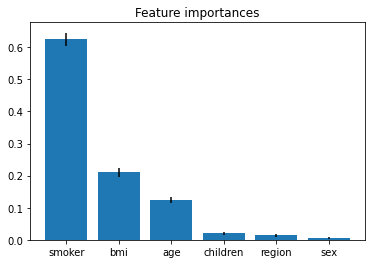

In [96]:
# Feature Importances

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
importance_list = [variables[indices[f]] for f in range(x.shape[1])]

pl.figure()
pl.title("Feature importances")
pl.bar(importance_list, importances[indices], yerr=std[indices])